In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading of the CSV file into a dataframe.

In [31]:
train_csv = pd.read_csv('train.csv')
train_csv

,Feature1,Feature2,Feature3,Feature4,Label
0,26.303954,True,59.919036,126.853479,170.361411
1,19.646076,False,34.504636,108.363933,29.897337
2,36.983463,False,98.503396,5.085491,373.460027
3,36.516512,False,38.418101,1.173449,26.696336
4,28.734387,False,99.286184,29.123061,332.682539
...,...,...,...,...,...
235,31.769066,False,189.379552,0.002523,1277.121058
236,28.015702,True,85.468516,61.646937,304.899057
237,31.477720,False,0.360471,19.738584,26.351808
238,27.198042,False,48.290593,18.924597,102.047530


PREPROCESSING:
1) Removing duplicate rows.
2) The columns where the null value percentage is less than 5% we should remove the rows where these null values are present.
3) The columns where the null value percentage is more than equal to 5% and less than 30%, we should use imputation techniques to remove null values.
4) The columns where the null value percentage is more than equal to 30%, we should drop the entire columns because a large amount of the columns are null values.

In [32]:
train_csv.drop_duplicates(inplace=True)

In [33]:
train_csv

,Feature1,Feature2,Feature3,Feature4,Label
0,26.303954,True,59.919036,126.853479,170.361411
1,19.646076,False,34.504636,108.363933,29.897337
2,36.983463,False,98.503396,5.085491,373.460027
3,36.516512,False,38.418101,1.173449,26.696336
4,28.734387,False,99.286184,29.123061,332.682539
...,...,...,...,...,...
235,31.769066,False,189.379552,0.002523,1277.121058
236,28.015702,True,85.468516,61.646937,304.899057
237,31.477720,False,0.360471,19.738584,26.351808
238,27.198042,False,48.290593,18.924597,102.047530


In [34]:
train_csv.isna().sum()

Feature1     9
Feature2     0
Feature3     0
Feature4    13
Label        0
dtype: int64

In [35]:
null_value_percentages=(train_csv.isna().sum()/train_csv.shape[0])*100
null_value_percentages

Feature1    3.750000
Feature2    0.000000
Feature3    0.000000
Feature4    5.416667
Label       0.000000
dtype: float64

In [36]:
rows_to_drop=null_value_percentages[null_value_percentages<5].sort_values(ascending=False)
rows_to_drop

Feature1    3.75
Feature2    0.00
Feature3    0.00
Label       0.00
dtype: float64

In [37]:
rows_to_drop = rows_to_drop.keys()
rows_to_drop

Index(['Feature1', 'Feature2', 'Feature3', 'Label'], dtype='object')

In [38]:
for row in rows_to_drop:
	if(null_value_percentages[row]<5):
		train_csv.drop(labels=train_csv.index[train_csv[row].isna()],inplace=True)
train_csv

,Feature1,Feature2,Feature3,Feature4,Label
0,26.303954,True,59.919036,126.853479,170.361411
1,19.646076,False,34.504636,108.363933,29.897337
2,36.983463,False,98.503396,5.085491,373.460027
3,36.516512,False,38.418101,1.173449,26.696336
4,28.734387,False,99.286184,29.123061,332.682539
...,...,...,...,...,...
235,31.769066,False,189.379552,0.002523,1277.121058
236,28.015702,True,85.468516,61.646937,304.899057
237,31.477720,False,0.360471,19.738584,26.351808
238,27.198042,False,48.290593,18.924597,102.047530


OBSERVATION: There are 9 rows for which null value percentage is less than 5% and  more than 0%.

In [39]:
columns_to_drop=null_value_percentages[null_value_percentages>30]
columns_to_drop

Series([], dtype: float64)

OBSERVATION: There are no columns for which null value percentage is more than 30%.
As there were no columns dropped, there are no chances of having duplicates.

In [40]:
null_value_percentages=(train_csv.isna().sum()/train_csv.shape[0])*100
null_value_percentages=null_value_percentages[null_value_percentages>0]
columns_to_impute=null_value_percentages.keys()
columns_to_impute

Index(['Feature4'], dtype='object')

In [41]:
for column in columns_to_impute:
	if(train_csv[column].dtype== object):
		print("Column: ",column,"\tCounts:\n", train_csv[column].value_counts(dropna=False))
		print("\n\n")

OBSERVATION: There are no categorical variables according to the code above. However, Feature2 is a categorical variable which has boolean values i.e. TRUE and FALSE. I will focus on Feature2 particularly.

In [42]:
train_csv['Feature2'].isna().sum()

np.int64(0)

OBSERVATION: Thus, there are 0 null values in the column 'Feature2'.
It has TRUE or FALSE values. Thus, to convert the categorical variable into a numerical variable, I will assign TRUE = 1 and FALSE = 0.
All the categorical variables must be converted to numerical variables before finding the best model.

In [43]:
# Using apply with a lambda function
train_csv['Feature2'] = train_csv['Feature2'].apply(lambda x: 1 if x == True else 0)
train_csv['Feature2']

# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# categorical_features = encoder.fit_transform(train_csv['Feature2'])
# train_csv['Feature2'] = categorical_features
# train_csv['Feature2']

0      1
1      0
2      0
3      0
4      0
      ..
235    0
236    1
237    0
238    0
239    0
Name: Feature2, Length: 231, dtype: int64

Now, all the categorical variables have been converted into numerical variables.
Now I have to handle columns where the null value percentage is more than 5% and less than 30%.

In [44]:
null_value_percentages=(train_csv.isna().sum()/train_csv.shape[0])*100
null_value_percentages=null_value_percentages[null_value_percentages>0]
null_value_percentages

Feature4    5.627706
dtype: float64

Mean imputation: Best for numerical data that is symmetrically distributed (i.e., normally distributed) without outliers. 
Median imputation: Best for numerical data that is skewed (non-symmetric) or contains outliers. 
Mode imputation: Best for categorical data or numerical data with discrete, frequently occurring values.

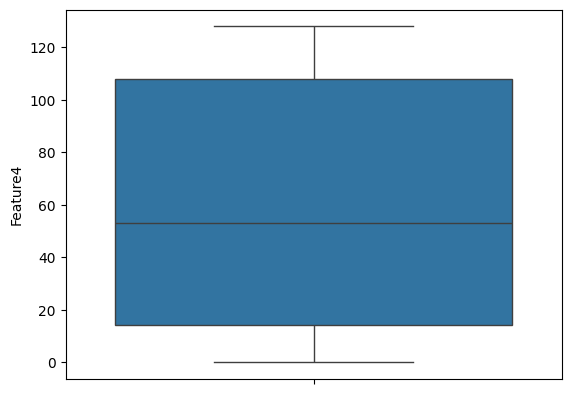

In [45]:
sns.boxplot(train_csv['Feature4'])
plt.show()

As we can see there are no outliers in Feature4 and it is a numerical variable. Thus, I will impute the values using mean.

In [46]:
mean_value = train_csv['Feature4'].mean()
train_csv['Feature4'] = train_csv['Feature4'].fillna(mean_value)
train_csv['Feature4'].isna().sum()

np.int64(0)

I will keep all the categorical variables as the initial columns and the numerical variables as the columns in the last.
This will help me to standardize and scale only the numerical variables.

In [47]:
# Columns to swap
col1, col2 = 'Feature1', 'Feature2'

# Swap the columns
columns = list(train_csv.columns)  # Get the list of column names
col1_index, col2_index = columns.index(col1), columns.index(col2)  # Find the indices of the columns

# Swap the columns in the list
columns[col1_index], columns[col2_index] = columns[col2_index], columns[col1_index]

# Reorder DataFrame columns based on the modified list
train_csv = train_csv[columns]

Now, I will split the given data into the features and the label.

In [48]:
X = train_csv.iloc[:,:-1]
Y = train_csv.iloc[:,-1]
print(X.head())
print(Y.head())

   Feature2   Feature1   Feature3    Feature4
0         1  26.303954  59.919036  126.853479
1         0  19.646076  34.504636  108.363933
2         0  36.983463  98.503396    5.085491
3         0  36.516512  38.418101    1.173449
4         0  28.734387  99.286184   29.123061
0    170.361411
1     29.897337
2    373.460027
3     26.696336
4    332.682539
Name: Label, dtype: float64


Splitting the data into 70% for training and 30% for testing with random seed as 42.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.head())
print(X_test.head())

     Feature2   Feature1   Feature3   Feature4
58          1  34.164947   9.495583  11.575065
118         0  11.022348  20.637867  17.132943
145         1  15.622881  -1.172008  53.978447
200         0  28.433578  55.033076   1.228235
67          0  33.477255  71.517470  95.088078
     Feature2   Feature1    Feature3    Feature4
226         0  22.844576   21.601206  118.834790
68          1  47.054120   24.510226    7.147082
9           0  42.297529  153.559543    0.498544
177         0  33.935619   87.076686    0.000631
15          0  42.506491   51.808843    0.005678


The X_train should be normalized (fitted and transformed). Then, using the same scaler we have to transform (only transform, not fit) the X_test.

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
# X_test[:, 1:] = scaler.transform(X_test[:, 1:])
# X_test
# AVOID STANDARD SCALING ON CATEGORICAL VARIABLES.

# Use .iloc for indexing when working with DataFrames
# This selects all rows and columns starting from the second column (index 1)
X_train_scaled = scaler.fit_transform(X_train.iloc[:, 1:])
X_test_scaled = scaler.transform(X_test.iloc[:, 1:])

# If you need to reassign back to the original DataFrame or join with unscaled data:
X_train.iloc[:, 1:] = X_train_scaled
X_test.iloc[:, 1:] = X_test_scaled

print(X_train.head())
print(X_test.head())

     Feature2  Feature1  Feature3  Feature4
58          1  0.373231 -0.333810 -1.137995
118         0 -1.732778 -0.275012 -1.012334
145         1 -1.314123 -0.390103 -0.179275
200         0 -0.148332 -0.093507 -1.371931
67          0  0.310650 -0.006518  0.750194
     Feature2  Feature1  Feature3  Feature4
226         0 -0.656939 -0.269928  1.287095
68          1  1.546163 -0.254577 -1.238109
9           0  1.113307  0.426421 -1.388429
177         0  0.352361  0.075589 -1.399687
15          0  1.132322 -0.110521 -1.399573


Flatten the data for plotting.

In [51]:
# Sort the data points for plotting

#np.argsort() takes 1D arrays
#returns indices that sort X_train in ascending order
# sorted_indices = np.argsort(X_train.flatten())

#X_train is sorted as per the indices
#Y_train is also sorted as per the same indices, so that X-Y values align
# X_train_sorted = X_train[sorted_indices]
# Y_train_sorted = Y_train[sorted_indices]

Model Training

In [52]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)
print(regression.coef_)

print(regression.intercept_)

print(regression.get_params())

[-86.02753229 209.88316685  56.07002684 -29.40021365]
325.9148475239498
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


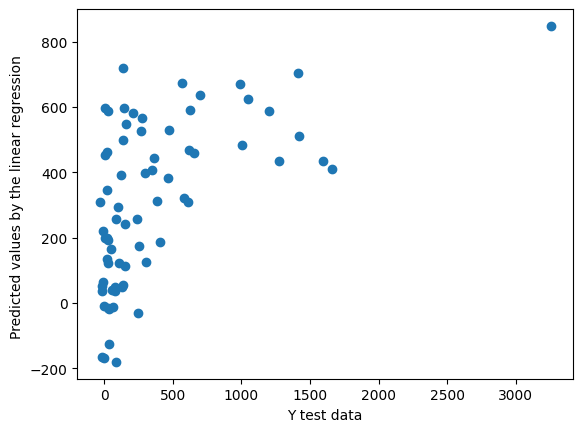

In [53]:
reg_pred = regression.predict(X_test)

plt.scatter(x=Y_test, y=reg_pred)
plt.xlabel('Y test data')
plt.ylabel('Predicted values by the linear regression ')
# Plotting the prediction vs Y test data. It should ideally resemble y = x line.
plt.show()

Finding the residuals.

In [54]:
residuals = Y_test - reg_pred
residuals

226    -112.111746
68     -561.399253
9       420.598041
177     -81.140320
15     -450.372929
          ...     
30      218.937688
160    -170.502949
70       77.970963
77       64.017724
5      1249.005729
Name: Label, Length: 70, dtype: float64

Now, I will find the mean squared error, mean absolute error and the square root of mean squared error.

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_test, reg_pred))
print(mean_absolute_error(Y_test, reg_pred))
print(np.sqrt(mean_squared_error(Y_test, reg_pred)))

214108.7846588084
287.2290749112306
462.71890458334246


R square and adjusted R square

In [56]:
from sklearn.metrics import r2_score
score = r2_score(y_true=Y_test, y_pred=reg_pred)
print(score)

0.285173666052255


In [57]:
adjusted_r2 = 1 - (1 - score)*((len(Y_test) - 1)/(len(Y_test) - X_test.shape[1] - 1))
print(adjusted_r2)

0.24118435319393228


In [59]:
test_csv = pd.read_csv('test.csv')
test_csv

,id,Feature1,Feature2,Feature3,Feature4
0,0,26.520753,False,2.276917,30.081571
1,1,19.260327,False,19.963927,32.540030
2,2,35.662216,False,114.665257,111.156286
3,3,17.693725,False,62.135788,11.251143
4,4,44.396224,False,167.567429,127.518999
5,5,39.486321,False,66.371886,117.147907
6,6,12.166547,False,32.204082,9.238612
7,7,40.238035,True,53.926449,29.840928
8,8,31.629610,True,58.782199,3.546138
9,9,46.008271,True,164.609236,22.277235


In [ ]:
# Columns to swap
col1, col2 = 'Feature1', 'Feature2'

# Swap the columns
columns = list(train_csv.columns)  # Get the list of column names
col1_index, col2_index = columns.index(col1), columns.index(col2)  # Find the indices of the columns

# Swap the columns in the list
columns[col1_index], columns[col2_index] = columns[col2_index], columns[col1_index]

# Reorder DataFrame columns based on the modified list
test_csv = test_csv[columns]

POLYNOMIAL REGRESSION

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# Assuming X_train, X_test, Y_train, Y_test are already defined and scaled if necessary

# Polynomial Regression - Different Orders
orders = []
for i in range(1, 11):
    orders.append(i)

# Lists to store the errors and R2 scores
train_errors = []
test_errors = []
r2_score_list = []

for order in orders:
    # Create an instance of PolynomialFeatures with the specified degree
    poly_features = PolynomialFeatures(degree=order)
    X_poly = poly_features.fit_transform(X=X_train)

    ridge_reg = Ridge(alpha=0.4)
    ridge_reg.fit(X=X_poly, y=Y_train)

    y_pred = ridge_reg.predict(poly_features.transform(X=X_test))

    print(f'Order = {order}, Training Ridge score = {ridge_reg.score(X=X_poly, y=Y_train)}, Testing Ridge score = {ridge_reg.score(poly_features.transform(X=X_test), y=Y_test)}')


Order = 1, Training Ridge score = 0.28106582663897883, Testing Ridge score = 0.28525072907151994
Order = 2, Training Ridge score = 0.5501796286239992, Testing Ridge score = -0.129371456548375
Order = 3, Training Ridge score = 0.9446139550958982, Testing Ridge score = -69.94229859020152
Order = 4, Training Ridge score = 0.9784516234299656, Testing Ridge score = -862.2705398547848
Order = 5, Training Ridge score = 0.9862525752682477, Testing Ridge score = -8.285945304786404
Order = 6, Training Ridge score = 0.9872878398489383, Testing Ridge score = -534.5357301432583
Order = 7, Training Ridge score = 0.9898147405462399, Testing Ridge score = -171367.55351365855
Order = 8, Training Ridge score = 0.9914984785109702, Testing Ridge score = -651176.9793673555
Order = 9, Training Ridge score = 0.9923611408568789, Testing Ridge score = -26843518.722619407
Order = 10, Training Ridge score = 0.9930473145276986, Testing Ridge score = -167636989.89468682


c:\Users\Valmik Belgaonkar\OneDrive\Desktop\IIITB Folder\5th Semester\Machine Learning\ML Lab\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=2.61817e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
